In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)


In [3]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [42]:
validation_generator = validation_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [43]:
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(
        'test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 7178 images belonging to 7 classes.


In [5]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))


In [6]:
cv2.ocl.setUseOpenCL(False)


In [7]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


C:\Users\xps\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=7178 // 64)


C:\Users\xps\AppData\Local\Temp/ipykernel_5260/417649974.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
448/448 [==============================] - 198s 441ms/step - loss: 1.8023 - accuracy: 0.2577 - val_loss: 1.7102 - val_accuracy: 0.3318
Epoch 2/50
448/448 [==============================] - 168s 375ms/step - loss: 1.6297 - accuracy: 0.3607 - val_loss: 1.5565 - val_accuracy: 0.4050
Epoch 3/50
448/448 [==============================] - 167s 373ms/step - loss: 1.5228 - accuracy: 0.4119 - val_loss: 1.4545 - val_accuracy: 0.4456
Epoch 4/50
448/448 [==============================] - 173s 386ms/step - loss: 1.4502 - accuracy: 0.4433 - val_loss: 1.3919 - val_accuracy: 0.4674
Epoch 5/50
448/448 [==============================] - 169s 377ms/step - loss: 1.3947 - accuracy: 0.4679 - val_loss: 1.3513 - val_accuracy: 0.4834
Epoch 6/50
448/448 [==============================] - 170s 379ms/step - loss: 1.3378 - accuracy: 0.4928 - val_loss: 1.3053 - val_accuracy: 0.5022
Epoch 7/50
448/448 [==============================] - 169s 376ms/step - loss: 1.2957 - accuracy: 0.5130 - val_loss: 1.2922 -

In [12]:
emotion_model.save_weights('react.h5')

In [14]:
emotion_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

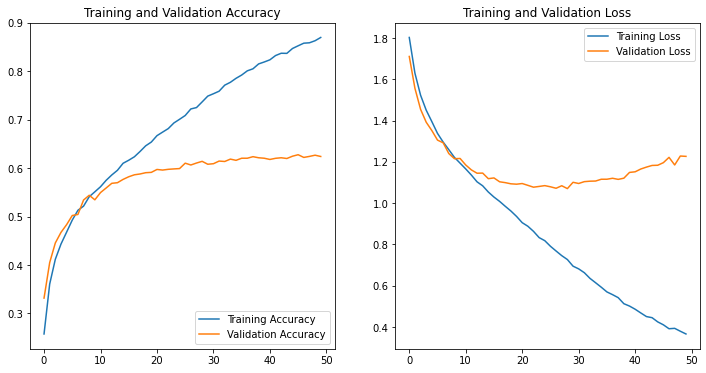

In [17]:
#showing results and model accuracy 
import matplotlib.pyplot as plt
acc = emotion_model_info.history['accuracy']
val_acc = emotion_model_info.history['val_accuracy']

loss = emotion_model_info.history['loss']
val_loss = emotion_model_info.history['val_loss']
epochs=50
epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [22]:
import os
import glob as gb
predpath = 'valid'
files = gb.glob(pathname= str(predpath +'/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 160


In [23]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [24]:
import cv2
X_pred = []
files = gb.glob(pathname= str(predpath + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (48,48))
    X_pred.append(list(image_array))   

In [25]:
print(f'we have {len(X_pred)} items in X_pred')

we have 160 items in X_pred


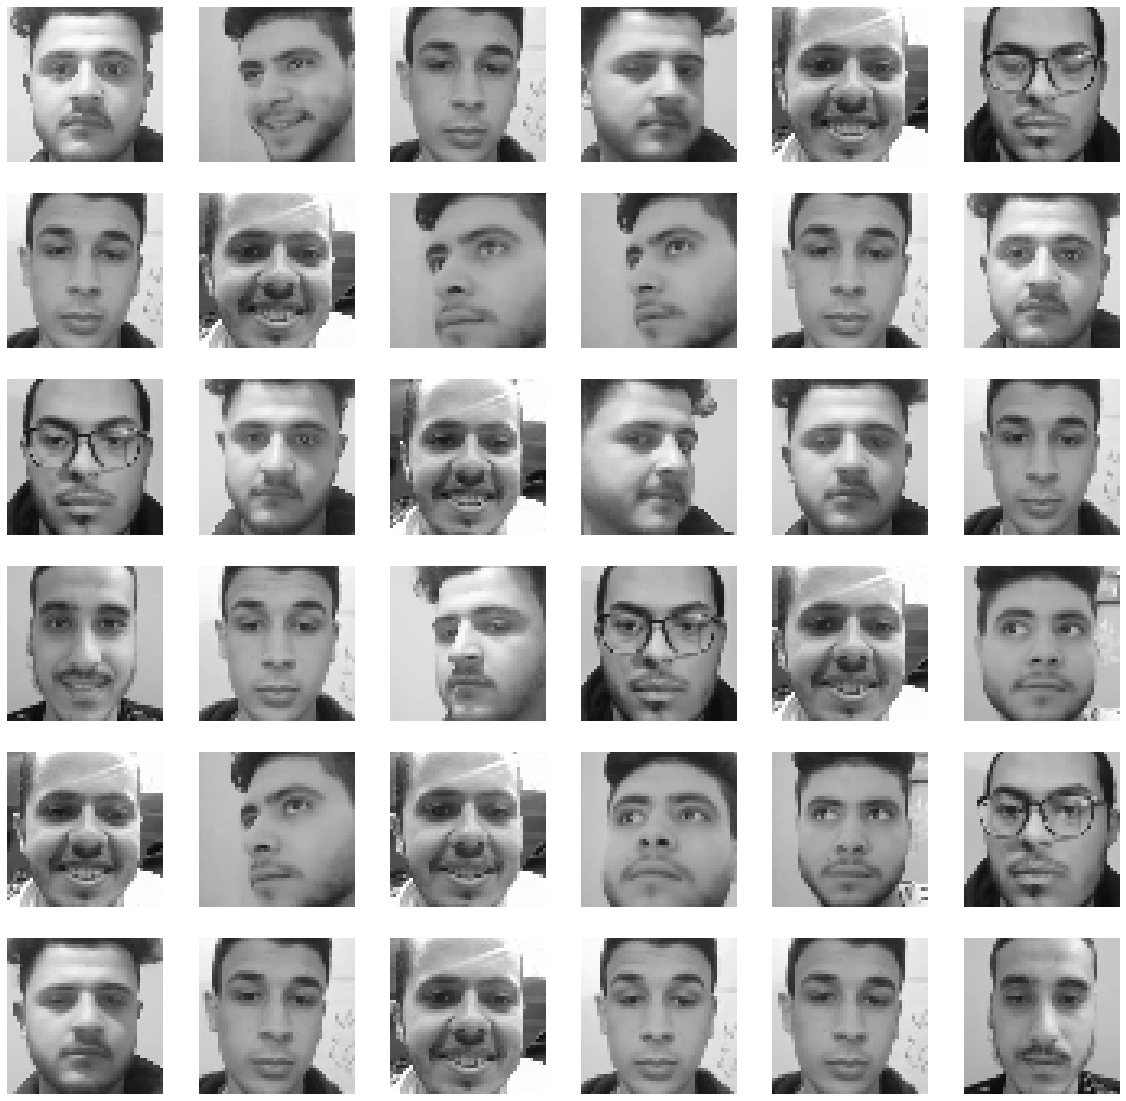

In [28]:
import numpy as np
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [30]:
X_pred_array = np.array(X_pred)

print(f'X_pred shape  is {X_pred_array.shape}')


X_pred shape  is (160, 48, 48, 3)


In [31]:
y_pred = emotion_model.predict(validation_generator)

print('Prediction Shape is {}'.format(y_pred.shape))

Prediction Shape is (7178, 7)


In [44]:
predictions = emotion_model.predict_generator(test_generator)


C:\Users\xps\AppData\Local\Temp/ipykernel_5260/3643318480.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = emotion_model.predict_generator(test_generator)


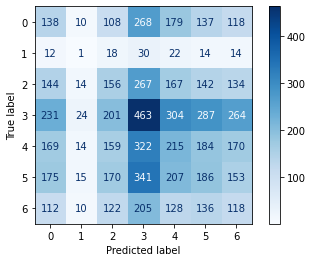

In [47]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
c_matrix = confusion_matrix(test_generator.classes, predictions.argmax(axis=1))
cm_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=emotion_dict)
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

In [48]:
print(classification_report(test_generator.classes, predictions.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.14      0.14      0.14       958
           1       0.01      0.01      0.01       111
           2       0.17      0.15      0.16      1024
           3       0.24      0.26      0.25      1774
           4       0.18      0.17      0.18      1233
           5       0.17      0.15      0.16      1247
           6       0.12      0.14      0.13       831

    accuracy                           0.18      7178
   macro avg       0.15      0.15      0.15      7178
weighted avg       0.18      0.18      0.18      7178



In [4]:
from keras.models import model_from_json
import numpy as np
import cv2

def react(image):
    x_valid=[]
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    path= "C:/Users/xps/Desktop/emotion-project/react.json"
    json_file = open(path,'r')
    loaded_model_json = json_file.read()
    json_file.close()
    emotion_model = model_from_json(loaded_model_json)
    # load weights into new model
    path2="C:/Users/xps/Desktop/emotion-project/react.h5"
    emotion_model.load_weights(path2)
    frame=cv2.imread(image)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    path3="C:/Users/xps/Desktop/emotion-project/haarcascade_frontalface_default.xml"
    face_detector = cv2.CascadeClassifier(path3)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    roi_gray_frame = gray_frame
    cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)
    # predict the emotions
    emotion_prediction = emotion_model.predict(cropped_img)
    maxindex = int(np.argmax(emotion_prediction))
    labels=emotion_dict[maxindex]
    x_valid.append(cv2.resize(frame,(120,120)))
    x_valid=np.array(x_valid)
    plt.figure(figsize=(20,20))
    plt.subplot(6,6,3)
    plt.imshow(x_valid[0])
    plt.axis('off')
    plt.title(labels)  
    


C:\Users\xps\AppData\Local\Temp/ipykernel_10744/4205994902.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,20))


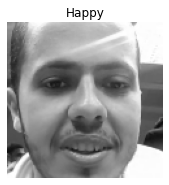

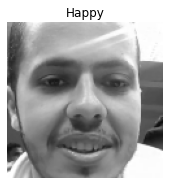

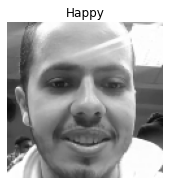

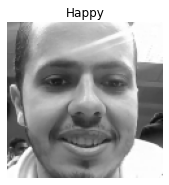

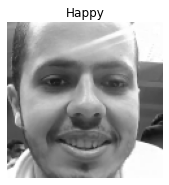

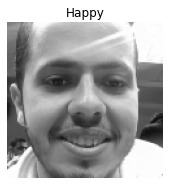

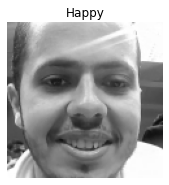

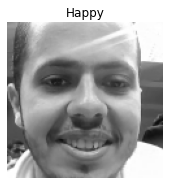

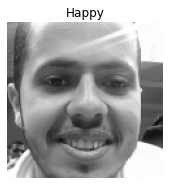

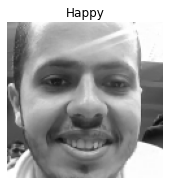

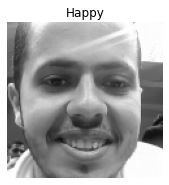

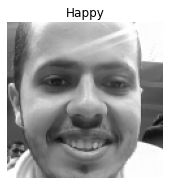

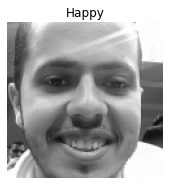

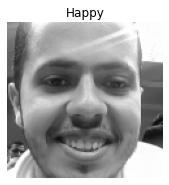

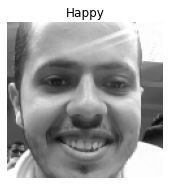

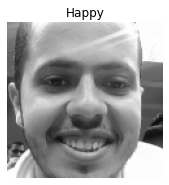

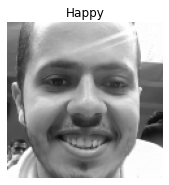

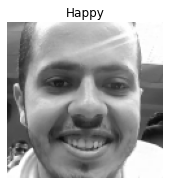

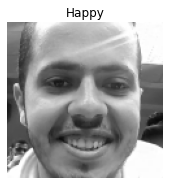

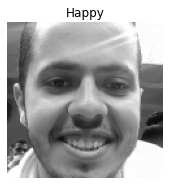

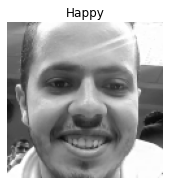

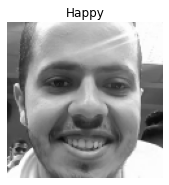

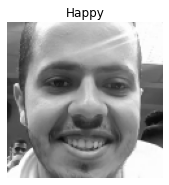

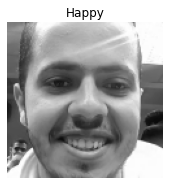

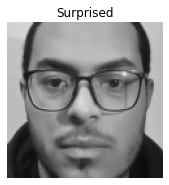

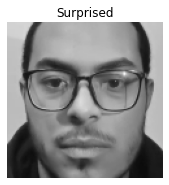

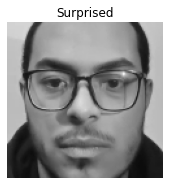

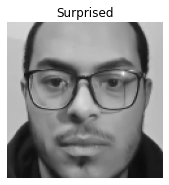

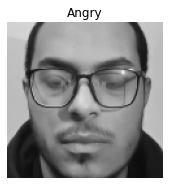

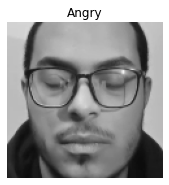

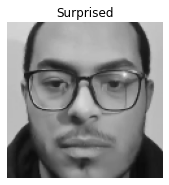

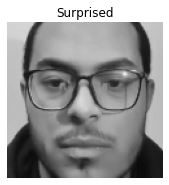

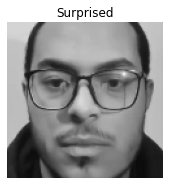

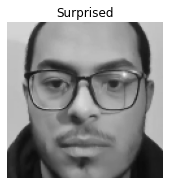

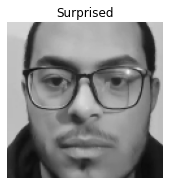

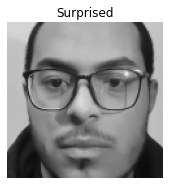

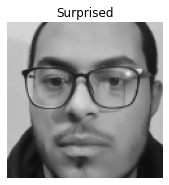

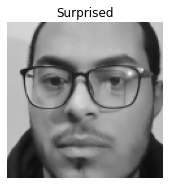

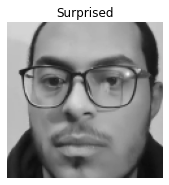

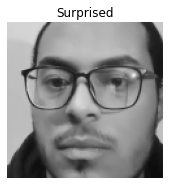

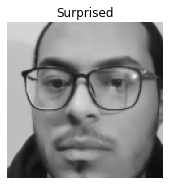

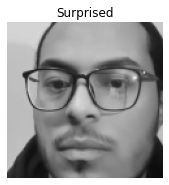

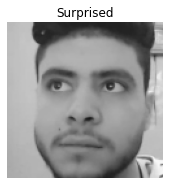

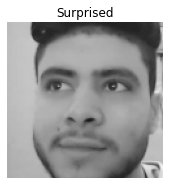

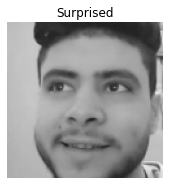

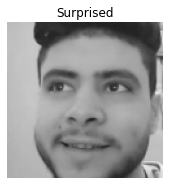

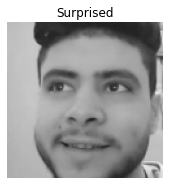

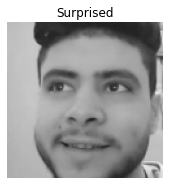

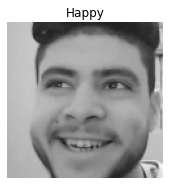

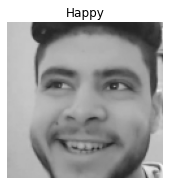

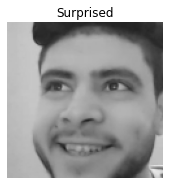

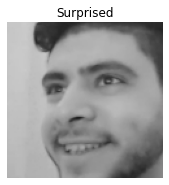

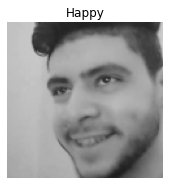

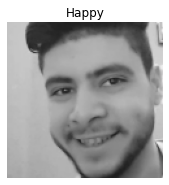

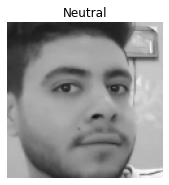

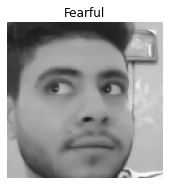

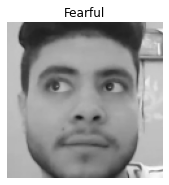

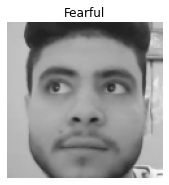

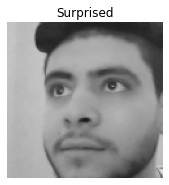

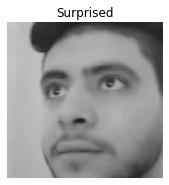

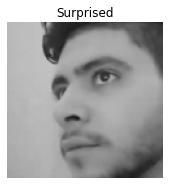

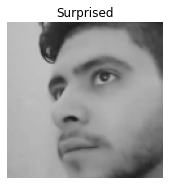

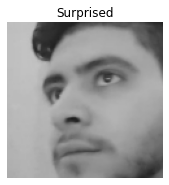

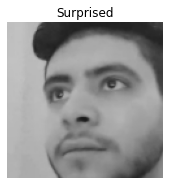

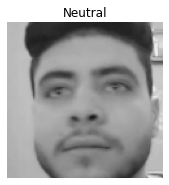

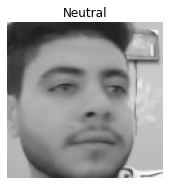

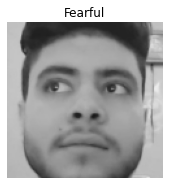

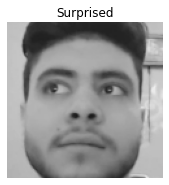

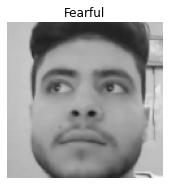

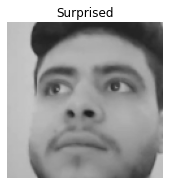

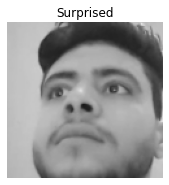

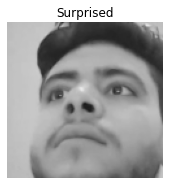

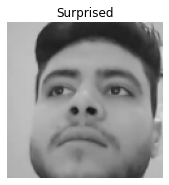

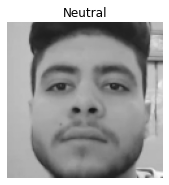

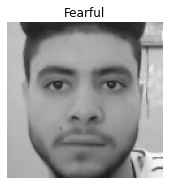

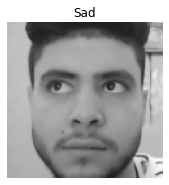

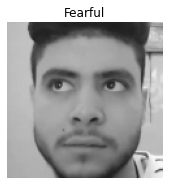

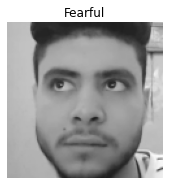

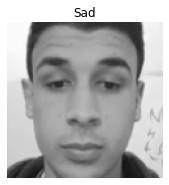

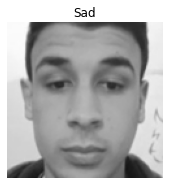

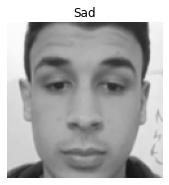

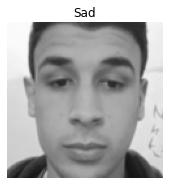

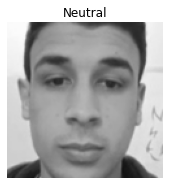

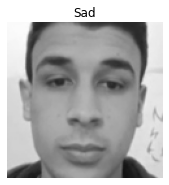

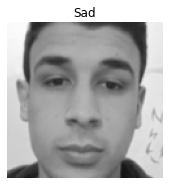

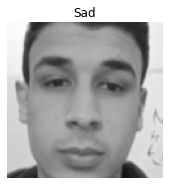

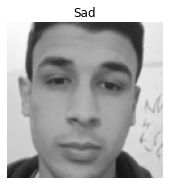

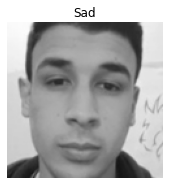

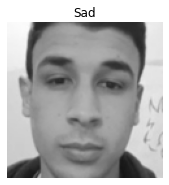

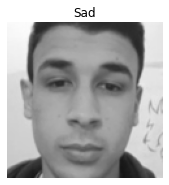

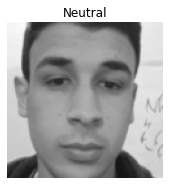

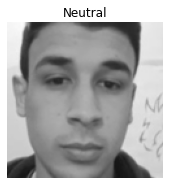

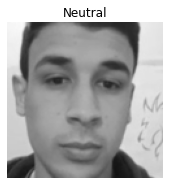

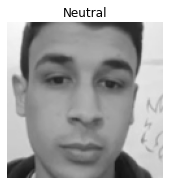

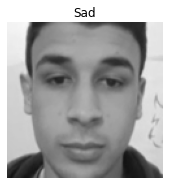

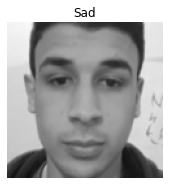

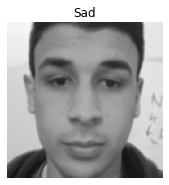

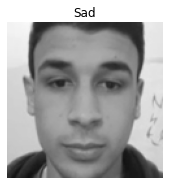

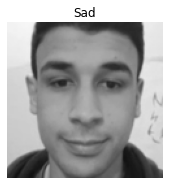

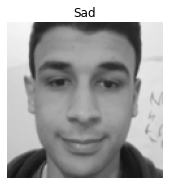

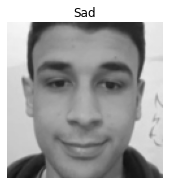

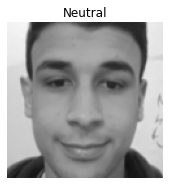

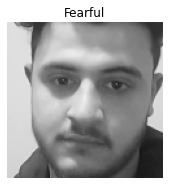

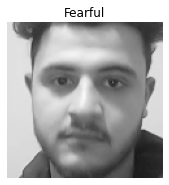

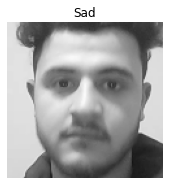

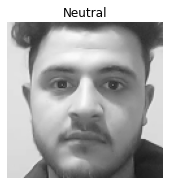

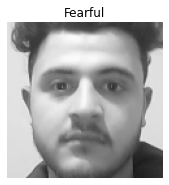

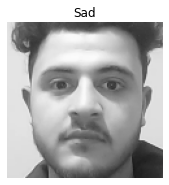

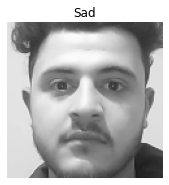

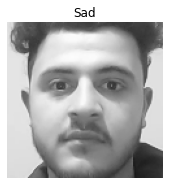

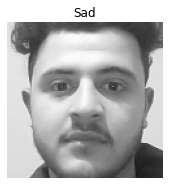

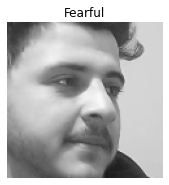

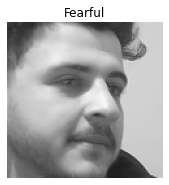

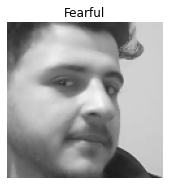

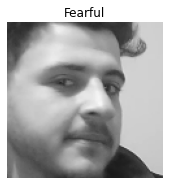

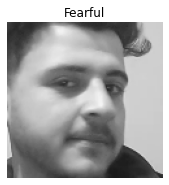

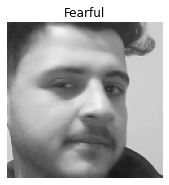

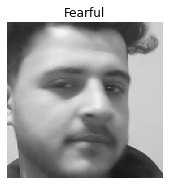

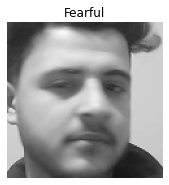

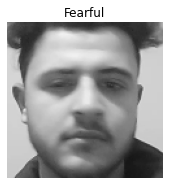

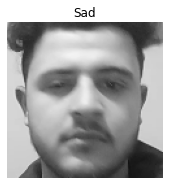

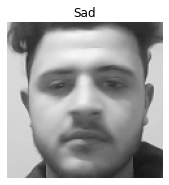

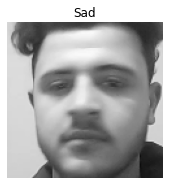

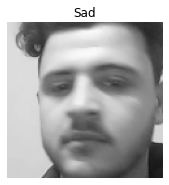

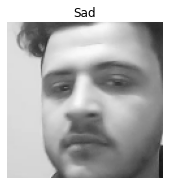

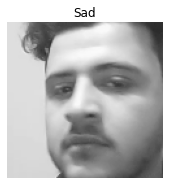

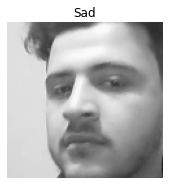

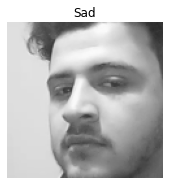

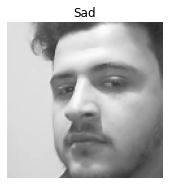

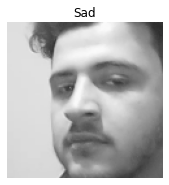

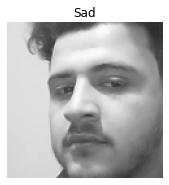

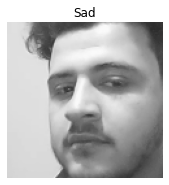

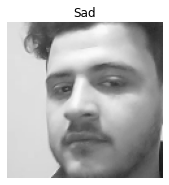

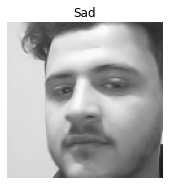

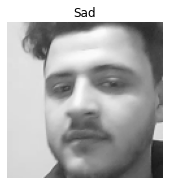

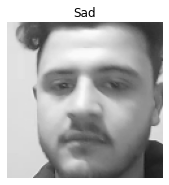

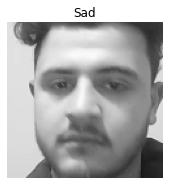

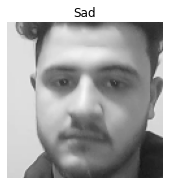

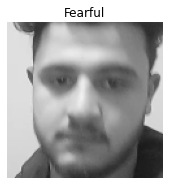

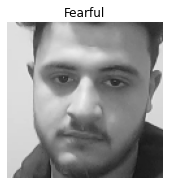

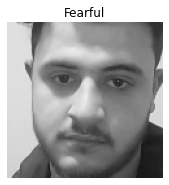

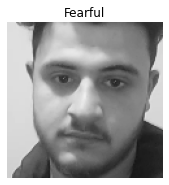

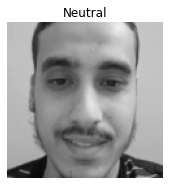

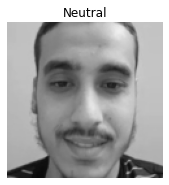

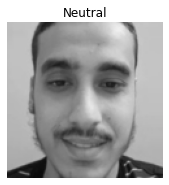

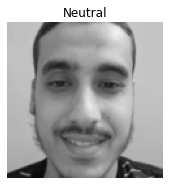

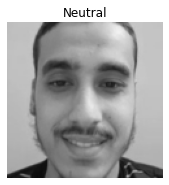

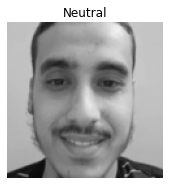

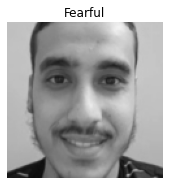

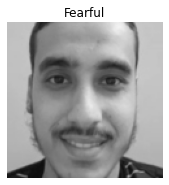

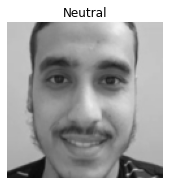

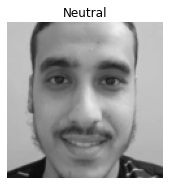

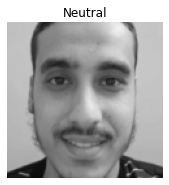

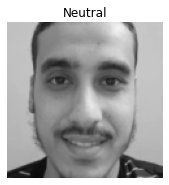

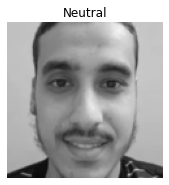

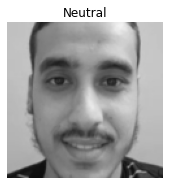

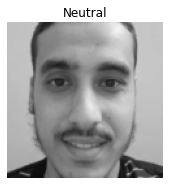

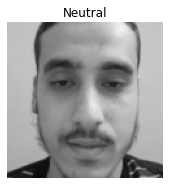

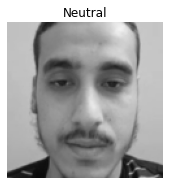

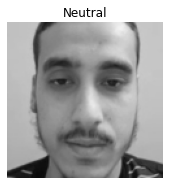

In [5]:
import glob as gb
import matplotlib.pyplot as plt
validpath=r'C:/Users/xps/Desktop/emotion-project/valid'
files=gb.glob(pathname=str(validpath+'/*.jpg'))
title=[]
x_valid=[]
x=0
for file in files :
    react(file)

In [ ]:
from flask import Flask,render_template,Response,request
%tb
app = Flask(__name__)
def react():
    
        emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}
        # load json and create model
        path= "C:/Users/xps/Desktop/emotion-project/react.json"
        json_file = open(path,'r')
        print("here")
        loaded_model_json = json_file.read()
        json_file.close()
        emotion_model = model_from_json(loaded_model_json)
        # load weights into new model
        path2="C:/Users/xps/Desktop/emotion-project/react.h5"
        emotion_model.load_weights(path2)
        print("Loaded model from disk")
        cap = cv2.VideoCapture(0)
        while True:
            # Find haar cascade to draw bounding box around face
            ret, frame = cap.read()
            frame = cv2.resize(frame, (1280, 720))
            if not ret and len(frame)==0:
                break
            path3="C:/Users/xps/Desktop/face-recognition/haarcascades/haarcascade_frontalface_default.xml"
            face_detector = cv2.CascadeClassifier(path3)
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            if  len(gray_frame)==0:
                break
            # detect faces available on camera
            num_faces = face_detector.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)

            # take each face available on the camera and Preprocess it
            for (x, y, w, h) in num_faces:
                cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (0, 255, 0), 4)
                roi_gray_frame = gray_frame[y:y + h, x:x + w]
                cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)

                # predict the emotions
                emotion_prediction = emotion_model.predict(cropped_img)
                maxindex = int(np.argmax(emotion_prediction))
                cv2.putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
            ret, buffer = cv2.imencode('.jpg', frame)
            frame = buffer.tobytes()
            yield (b'--frame\r\n'
                        b'Content-Type: image/jpeg\r\n\r\n' + frame + b'\r\n')

@app.route('/', methods=['POST', "get"])
def reaction():
        return render_template('react.html')
@app.route('/react_vedio', methods=['POST', "get"])
def react_vedio():
        return Response(react(),
                    mimetype="multipart/x-mixed-replace; boundary=frame")  
if __name__ == '__main__':
    app.run()


In [2]:
print("test")

test
